In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(10))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 20 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 7200 samples, validate on 801 samples
Epoch 1/20
7200/7200 [==============================] - 5s 689us/sample - loss: 3.0083 - acc: 0.1165 - val_loss: 2.1407 - val_acc: 0.1860
Epoch 2/20
7200/7200 [==============================] - 4s 585us/sample - loss: 1.8710 - acc: 0.3697 - val_loss: 1.1398 - val_acc: 0.6717
Epoch 3/20
7200/7200 [==============================] - 5s 641us/sample - loss: 1.0844 - acc: 0.6624 - val_loss: 0.6416 - val_acc: 0.8065
Epoch 4/20
7200/7200 [==============================] - 4s 591us/sample - loss: 0.7673 - acc: 0.7711 - val_loss: 0.6712 - val_acc: 0.7928
Epoch 5/20
7200/7200 [==============================] - 4s 601us/sample - loss: 0.6210 - acc: 0.8235 - val_loss: 0.4544 - val_acc: 0.8514
Epoch 6/20
7200/7200 [==============================] - 4s 600us/sample - loss: 0.5209 - acc: 0.8472 - val_loss: 0.3865 - val_acc: 0.8801
Epoch 7/20
7200/7200 [======================

Saved model to disk
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


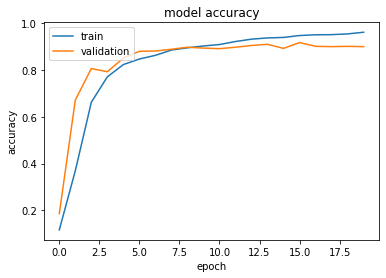

In [2]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('kerasmodel.h5')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


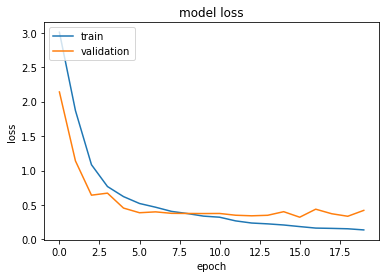

In [3]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [5]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=32)
print('test loss, test acc:', results)



# Evaluate on test data
2001/2001 [==============================] - 0s 140us/sample - loss: 0.4536 - acc: 0.8966
test loss, test acc: [0.4535882523928446, 0.8965517]


In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict = model.predict(X_test)
predict_class = np.argmax(predict, axis=1)
predict_class = predict_class.tolist()
predict_class

[7,
 2,
 8,
 4,
 2,
 6,
 5,
 1,
 8,
 0,
 1,
 9,
 1,
 5,
 9,
 0,
 6,
 5,
 2,
 5,
 4,
 3,
 1,
 9,
 9,
 1,
 4,
 6,
 8,
 8,
 1,
 3,
 8,
 2,
 6,
 6,
 7,
 9,
 8,
 9,
 5,
 0,
 0,
 3,
 8,
 8,
 3,
 4,
 4,
 2,
 2,
 4,
 8,
 3,
 5,
 8,
 0,
 3,
 6,
 1,
 8,
 5,
 3,
 4,
 6,
 1,
 6,
 9,
 5,
 5,
 0,
 9,
 7,
 9,
 3,
 2,
 3,
 0,
 9,
 1,
 8,
 5,
 8,
 0,
 3,
 3,
 6,
 5,
 2,
 1,
 1,
 0,
 0,
 1,
 7,
 7,
 9,
 2,
 4,
 1,
 4,
 0,
 9,
 4,
 8,
 4,
 2,
 3,
 2,
 6,
 6,
 7,
 3,
 2,
 6,
 0,
 7,
 8,
 5,
 1,
 4,
 3,
 9,
 4,
 8,
 7,
 9,
 4,
 0,
 8,
 1,
 9,
 5,
 1,
 4,
 1,
 8,
 4,
 1,
 2,
 4,
 5,
 2,
 6,
 4,
 9,
 0,
 9,
 5,
 9,
 9,
 5,
 2,
 2,
 4,
 6,
 1,
 6,
 7,
 7,
 5,
 1,
 9,
 4,
 0,
 5,
 3,
 3,
 0,
 9,
 3,
 0,
 6,
 1,
 5,
 7,
 7,
 6,
 6,
 7,
 3,
 0,
 4,
 0,
 2,
 7,
 3,
 4,
 6,
 0,
 9,
 6,
 9,
 3,
 6,
 2,
 6,
 9,
 1,
 7,
 6,
 9,
 2,
 8,
 7,
 7,
 3,
 6,
 5,
 7,
 5,
 1,
 9,
 6,
 0,
 6,
 3,
 9,
 4,
 4,
 0,
 3,
 9,
 5,
 5,
 3,
 3,
 0,
 9,
 3,
 8,
 7,
 6,
 2,
 8,
 9,
 3,
 2,
 0,
 8,
 5,
 2,
 9,
 4,
 0,
 2,
 7,
 8,
 6,
 3,


In [7]:
import seaborn as sn
import pandas as pd
cm =confusion_matrix(y_test, predict_class)
cm

array([[204,   1,   1,   1,   0,   1,   3,   0,   1,   0],
       [  1, 159,   7,   3,   0,   3,   0,   2,   1,   3],
       [  5,   3, 151,   3,   1,   4,  16,   8,   0,   3],
       [  2,   3,   8, 182,   0,   2,   0,   4,   2,   2],
       [  3,   0,   6,   2, 164,   5,   0,   4,   0,   4],
       [  1,   1,   4,   8,   2, 187,   1,   0,   2,   6],
       [  4,   0,   9,   0,   0,   1, 199,   2,   0,   0],
       [  1,   0,   3,   5,   0,   1,   1, 168,   1,   3],
       [  3,   5,   3,   7,   0,   3,   2,   0, 184,   2],
       [  1,   2,   2,   2,   0,   1,   0,   0,   0, 196]], dtype=int64)

In [8]:
CATEGORIES = ["apple","banana","baseball","bee","camera","car","clock","diamond","hand","tornado"]

df_cm = pd.DataFrame(cm, index = [i for i in CATEGORIES],
                  columns = [i for i in CATEGORIES])

df_cm

,apple,banana,baseball,bee,camera,car,clock,diamond,hand,tornado
apple,204,1,1,1,0,1,3,0,1,0
banana,1,159,7,3,0,3,0,2,1,3
baseball,5,3,151,3,1,4,16,8,0,3
bee,2,3,8,182,0,2,0,4,2,2
camera,3,0,6,2,164,5,0,4,0,4
car,1,1,4,8,2,187,1,0,2,6
clock,4,0,9,0,0,1,199,2,0,0
diamond,1,0,3,5,0,1,1,168,1,3
hand,3,5,3,7,0,3,2,0,184,2
tornado,1,2,2,2,0,1,0,0,0,196


In [9]:
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
num_classes = 10
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))

In [10]:
precision = TP/(TP+FP)
precision

array([0.90666667, 0.9137931 , 0.77835052, 0.85446009, 0.98203593,
       0.89903846, 0.8963964 , 0.89361702, 0.96335079, 0.89497717])

In [11]:
recall = TP/(TP+FN)
recall

array([0.96226415, 0.88826816, 0.77835052, 0.88780488, 0.87234043,
       0.88207547, 0.9255814 , 0.91803279, 0.88038278, 0.96078431])

In [12]:
f1 = 2*precision*recall/(precision+recall)
f1

array([0.93363844, 0.90084986, 0.77835052, 0.8708134 , 0.92394366,
       0.89047619, 0.91075515, 0.90566038, 0.92      , 0.92671395])